___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочные задания по классификации текста - РЕШЕНИЯ

### На входе у Вас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

## Выполните задания, написанные жирным шрифтом!

**Задание: Выполните импорт библиотек и загрузите данные из файла в датафрейм pandas.** <br>
Данные для этого задания находятся в файле `'../DATA/moviereviews.csv'`.

In [1]:
# Напишите Ваш код в этой ячейке


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Задание: Проверьте, есть ли какие-либо отсутствующие значения в этих данных.**

In [5]:
# Напишите Ваш код в этой ячейке


In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Задание: Удалите отзывы о фильмах, текст которых принимает значение NaN**

In [7]:
df = df.dropna()

**Задание: Проверьте, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов. Как это можно проверить? Это можно сделать разными способами. После того как Вы найдёте такие отзывы, удалите их из датафрейма. [В качестве подсказки можете использовать эту ссылку.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [8]:
df['review'].str.isspace().sum()

27

In [9]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [10]:
df = df[~df['review'].str.isspace()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Задание: Посчитайте количество строк для различных значений колонки label:**

In [12]:
# Напишите Ваш код в этой ячейке


In [13]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## Исследование данных (EDA) для мешка слов (bag of words)

**Бонусное задание: можете ли Вы с помощью модели CountVectorizer найти 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label? Обратите внимание, что это бонусное задание, и здесь Вам нужно будет сделать нечто такое, что мы не проходили в лекциях. Однако мы надеемся, что с помощью поиска в Google или другом поисковике Вы сможете найти недостающие элементы.  [В качестве подсказки можете использовать эту ссылку.](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(stop_words='english')

In [16]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn метод get_feature_names() был 
# переименован в get_feature_names_out()
#
#matrix = cv.fit_transform(df[df['label']=='neg']['review'])
#freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    

matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

In [17]:
# Сортируем от больших к меньшим
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [18]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn метод get_feature_names() был 
# переименован в get_feature_names_out()
#
#matrix = cv.fit_transform(df[df['label']=='pos']['review'])
#freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    

matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

In [19]:
# Сортируем от больших к меньшим
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Данные и обучение модели

**Задание: Разделите данные на признаки X и целевую переменную y, а также выполните разбиение на обучающий и тестовый наборы данных (train/test split). Вы можете использовать любые значения параметров, но если Вы захотите свериться с блокнотом с решениями, то в нём мы использовали `test_size=0.20, random_state=101`**

In [20]:
# Напишите Ваш код в этой ячейке


In [21]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Обучение модели

**Задание: Создайте пайплайн, в котором Вы создадите вектора TF-IDF из сырых текстовых даных, а затем обучите модель машинного обучения, которую сами выберете. После создания пайплайна выполните его обучение на обучающем наборе данных.**

In [22]:
# Напишите Ваш код в этой ячейке


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [24]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [25]:
# Подаём обучающие данные на вход в пайплайн
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Задание: выведите на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [26]:
# Напишите Ваш код в этой ячейке


In [27]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn вместо plot_confusion_matrix нужно будет 
# использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions 
#
#from sklearn.metrics import classification_report,ConfusionMatrixDisplay

from sklearn.metrics import classification_report,plot_confusion_matrix

In [28]:
preds = pipe.predict(X_test)

In [29]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



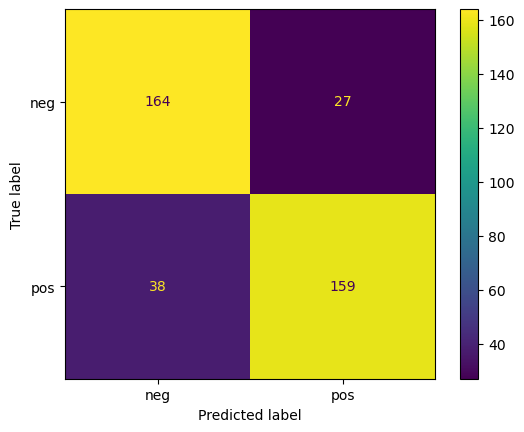

In [30]:
#ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)
plot_confusion_matrix(pipe,X_test,y_test)

## Отличная работа!